# Results_CaseStudy

In [3]:
from main import main
import pandas as pd 
from sklearn.metrics import adjusted_rand_score , silhouette_score , normalized_mutual_info_score ,fowlkes_mallows_score

%load_ext autoreload
%autoreload 2

In [4]:
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

def plot(file_path):
    data = pd.read_csv(file_path)
    
    plt.figure(figsize = (6,6))
    sns.scatterplot(data = data , 
                    x = "x" , 
                    y = "y" , 
                    hue = "group",
                    # hue_order = ['A' , 'B' , 'C'],
                    palette = 'muted')
    plt.title("Spatial Distributions of Groups")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.legend(title = "Group")
    plt.show()

In [5]:
def evaluate_metrics(coordinate_file_truth , coordinate_file_pred , apply_gene_similarity = False , apply_AD_weight = False):
    truth_data = pd.read_csv(coordinate_file_truth)
    pred_data = pd.read_csv(coordinate_file_pred)
    
    ARI = adjusted_rand_score(truth_data['group'] , pred_data['group'])
    NMI = normalized_mutual_info_score(truth_data['group'], pred_data['group'])
    Silhouette = silhouette_score(pred_data[['x', 'y']], pred_data['group'])
    FMI = fowlkes_mallows_score(truth_data['group'], pred_data['group'])
    SGD = main(coordinate_file_truth , coordinate_file_pred ,apply_gene_similarity = apply_gene_similarity , apply_AD_weight=apply_AD_weight)
    
    return {
        "ARI":ARI , 
        "NMI":NMI ,
        "Silhouette Coefficient":Silhouette,
        "FMI":FMI,
        "SGD":SGD
    }

## Case 1 : 边缘/中心

### 边缘

In [25]:
coordinate_file_truth = "data/simulate/Case1 (center_edge)/truth_SpatialData.csv"
coordinate_file_pred = "data/simulate/Case1 (center_edge)/edge_SpatialData.csv"

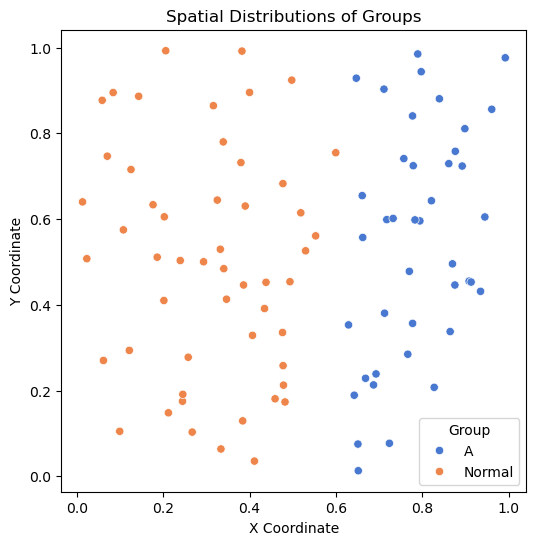

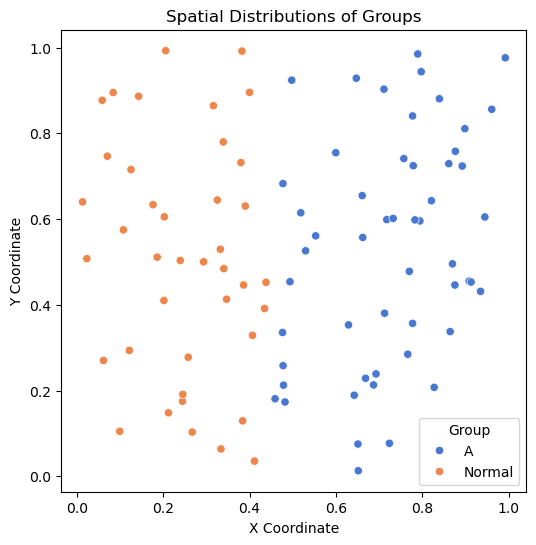

In [13]:
plot(coordinate_file_truth)
plot(coordinate_file_pred)

In [26]:
evaluate_metrics(coordinate_file_truth ,coordinate_file_pred , apply_gene_similarity = False , apply_AD_weight = False)

Graph Building took 0.01 seconds.
Getting edge attributes took 15.29 seconds.
Entire Loop took 6.89812 seconds.
Entire Loop took 6.73190 seconds.
Entire Loop took 10.66709 seconds.


{'ARI': 0.5455688378269921,
 'NMI': 0.5568468396464958,
 'Silhouette Coefficient': 0.34753340616847317,
 'FMI': 0.7741665777804776,
 'SGD': 0.9345856477588812}

### 中心

In [24]:
coordinate_file_truth = "data/simulate/Case1 (center_edge)/truth_SpatialData.csv"
coordinate_file_pred = "data/simulate/Case1 (center_edge)/center_SpatialData.csv"

evaluate_metrics(coordinate_file_truth ,coordinate_file_pred ,apply_gene_similarity = False , apply_AD_weight = False)

Graph Building took 0.02 seconds.
Getting edge attributes took 14.83 seconds.
Entire Loop took 6.87801 seconds.
Entire Loop took 6.90457 seconds.
Entire Loop took 10.65213 seconds.


{'ARI': 0.5455688378269921,
 'NMI': 0.5568468396464958,
 'Silhouette Coefficient': 0.17981067635626208,
 'FMI': 0.7741665777804776,
 'SGD': 1.7813091409162745}

## Case 2 : FN vs FP

### Case2.1:Binary

#### FP

In [16]:
coordinate_file_truth = "data/simulate/Case2 (FN_FP)/Case2.1/truth_SpatialData.csv"
coordinate_file_pred = "data/simulate/Case2 (FN_FP)/Case2.1/FP_SpatialData.csv"

evaluate_metrics(coordinate_file_truth ,coordinate_file_pred , apply_gene_similarity= False , apply_AD_weight=True)

Graph Building took 0.03 seconds.
Getting edge attributes took 32.08 seconds.
Entire Loop took 14.53909 seconds.
Entire Loop took 14.40916 seconds.
Entire Loop took 21.48021 seconds.


{'ARI': 0.3545232273838631,
 'NMI': 0.4207914918051407,
 'Silhouette Coefficient': 0.20517418735865817,
 'FMI': 0.7001099601629517,
 'SGD': 1.6328656700813944}

#### FN

In [17]:
coordinate_file_truth = "data/simulate/Case2 (FN_FP)/Case2.1/truth_SpatialData.csv"
coordinate_file_pred = "data/simulate/Case2 (FN_FP)/Case2.1/FN_SpatialData.csv"

evaluate_metrics(coordinate_file_truth ,coordinate_file_pred , apply_gene_similarity= False , apply_AD_weight=True)

Graph Building took 0.06 seconds.
Getting edge attributes took 59.16 seconds.
Entire Loop took 14.06835 seconds.
Entire Loop took 14.89573 seconds.
Entire Loop took 22.04033 seconds.


{'ARI': 0.3545232273838631,
 'NMI': 0.4207914918051407,
 'Silhouette Coefficient': 0.26403732715163003,
 'FMI': 0.7001099601629517,
 'SGD': 1.8912217571221173}

### Case2.2: 3 types 
Anomaly: B C 

Normal:A

type B is more serious than type C

#### B-A

In [18]:
coordinate_file_truth = "data/simulate/Case2 (FN_FP)/Case2.2/Truth_SpatialData.csv"
coordinate_file_pred = "data/simulate/Case2 (FN_FP)/Case2.2/BA_SpatialData.csv"

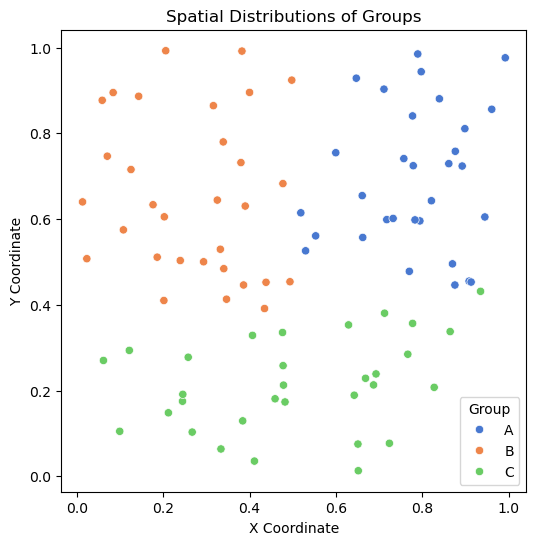

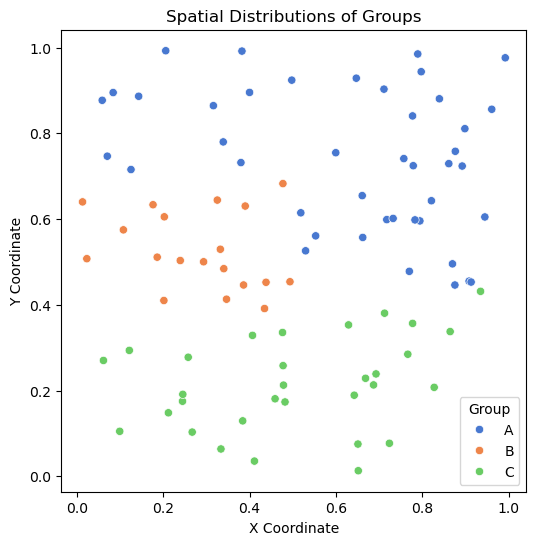

In [42]:
plot(coordinate_file_truth)
plot(coordinate_file_pred)

In [19]:
evaluate_metrics(coordinate_file_truth ,coordinate_file_pred , apply_gene_similarity= False , apply_AD_weight=True)

Graph Building took 0.01 seconds.
Getting edge attributes took 15.57 seconds.
Entire Loop took 8.58457 seconds.
Entire Loop took 6.97936 seconds.
Entire Loop took 8.48441 seconds.


{'ARI': 0.6891681870396649,
 'NMI': 0.7687589461923225,
 'Silhouette Coefficient': 0.251658084529804,
 'FMI': 0.79646086722093,
 'SGD': 1.143563877191395}

#### C-A

In [20]:
coordinate_file_truth = "data/simulate/Case2 (FN_FP)/Case2.2/Truth_SpatialData.csv"
coordinate_file_pred = "data/simulate/Case2 (FN_FP)/Case2.2/CA_SpatialData.csv"

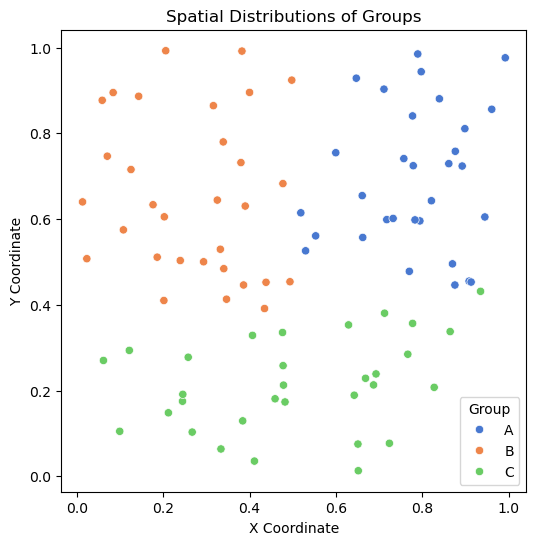

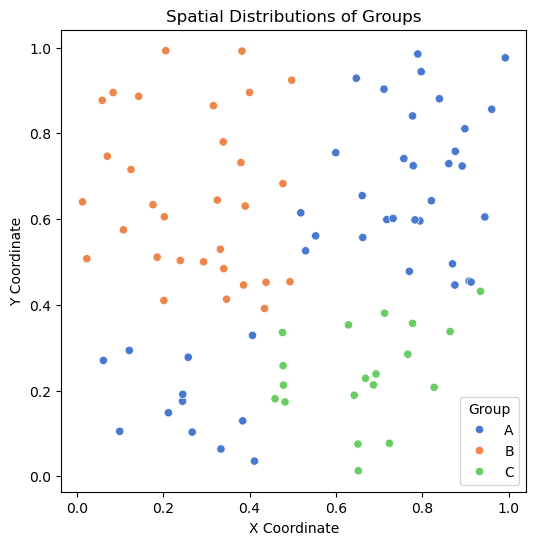

In [44]:
plot(coordinate_file_truth)
plot(coordinate_file_pred)

In [21]:
evaluate_metrics(coordinate_file_truth ,coordinate_file_pred , apply_gene_similarity= False , apply_AD_weight=True)

Graph Building took 0.02 seconds.
Getting edge attributes took 16.02 seconds.
Entire Loop took 6.90507 seconds.
Entire Loop took 7.07750 seconds.
Entire Loop took 8.07293 seconds.


{'ARI': 0.6891681870396649,
 'NMI': 0.7687589461923224,
 'Silhouette Coefficient': 0.2376376035724321,
 'FMI': 0.79646086722093,
 'SGD': 0.3427312572808028}

## Case 4 : Gene Similarity

### Case 4.1:不同类的分到同一类

#### 相似

In [9]:
coordinate_file_truth = "data/simulate/Case4 (GeneSimilarity)/4.1/test/sim_truth_SpatialData.csv"
coordinate_file_pred = "data/simulate/Case4 (GeneSimilarity)/4.1/test/sim_pred_SpatialData.csv"

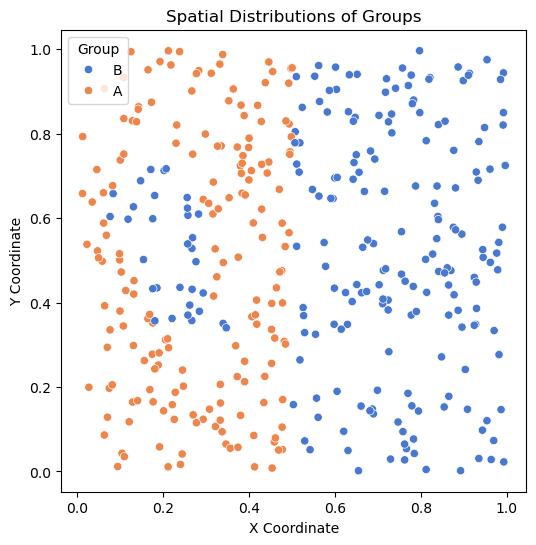

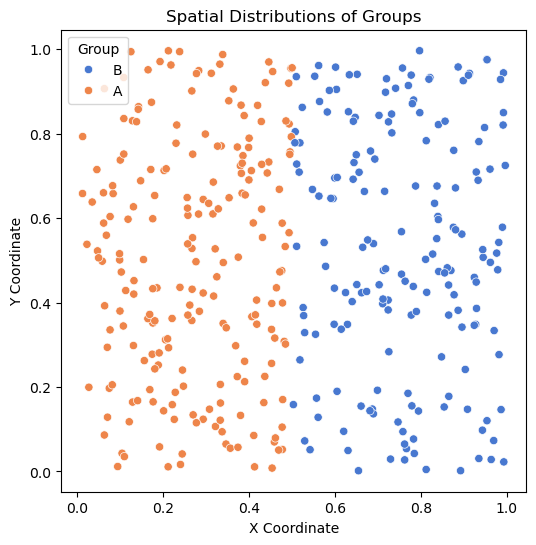

In [10]:
plot(coordinate_file_truth)
plot(coordinate_file_pred)

In [11]:
evaluate_metrics(coordinate_file_truth ,coordinate_file_pred , apply_gene_similarity= True , apply_AD_weight=False)

Graph Building took 0.08 seconds.
Getting edge attributes took 423.45 seconds.
Entire Loop took 58.59765 seconds.
Entire Loop took 96.63956 seconds.
Entire Loop took 123.81630 seconds.


{'ARI': 0.6958079250654646,
 'NMI': 0.6645138507722512,
 'Silhouette Coefficient': 0.3442246855857878,
 'FMI': 0.8485536034131528,
 'SGD': 1.314183936704076}

#### 不相似

In [12]:
coordinate_file_truth = "data/simulate/Case4 (GeneSimilarity)/4.1/test/dissim_truth_SpatialData.csv"
coordinate_file_pred = "data/simulate/Case4 (GeneSimilarity)/4.1/test/dissim_pred_SpatialData.csv"

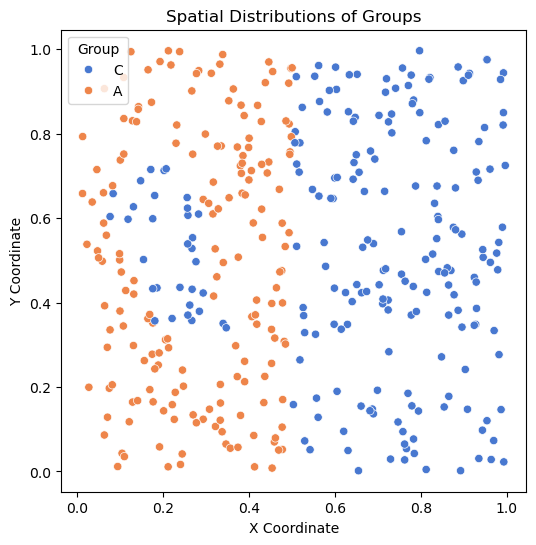

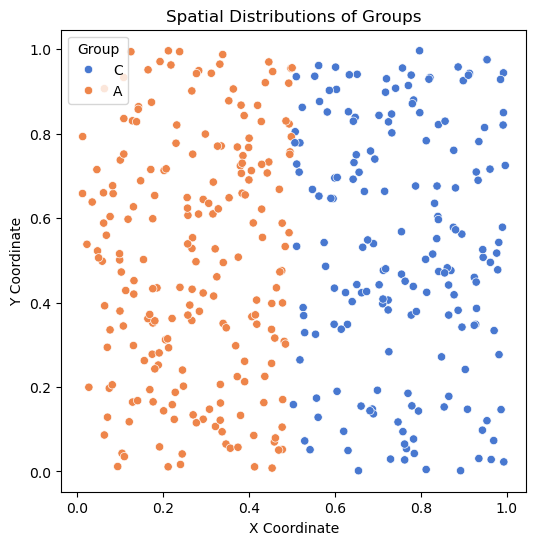

In [13]:
plot(coordinate_file_truth)
plot(coordinate_file_pred)

In [14]:
evaluate_metrics(coordinate_file_truth ,coordinate_file_pred , apply_gene_similarity= True , apply_AD_weight=False)

Graph Building took 0.15 seconds.
Getting edge attributes took 405.88 seconds.
Entire Loop took 111.71037 seconds.
Entire Loop took 110.15443 seconds.
Entire Loop took 266.27354 seconds.


{'ARI': 0.6958079250654646,
 'NMI': 0.6645138507722512,
 'Silhouette Coefficient': 0.3442246855708589,
 'FMI': 0.8485536034131528,
 'SGD': 1.1990442699163881}

### Case4.2:不同类分到同一类

#### 相似 B C

In [ ]:
coordinate_file_truth = "data/simulate/Case4/4.1/test/sim_pred_SpatialData.csv"
coordinate_file_pred = "data/simulate/Case4/4.1/test/sim_truth_SpatialData.csv"

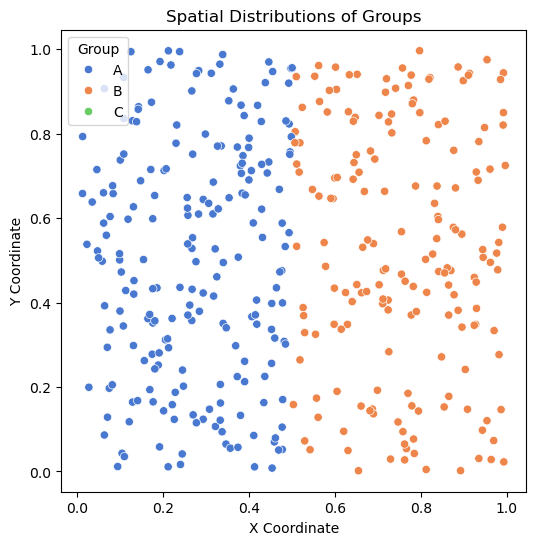

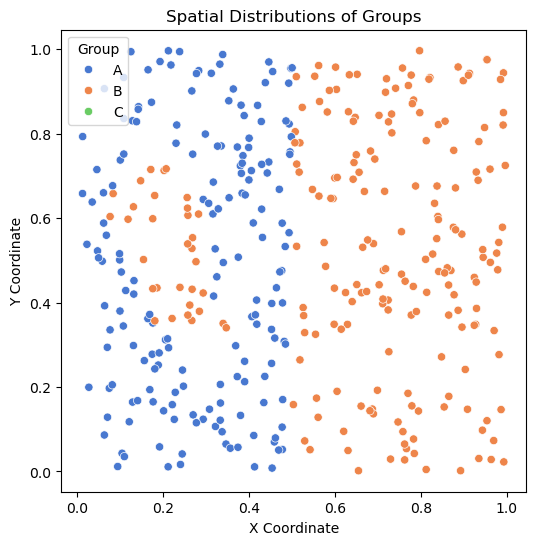

In [ ]:
plot(coordinate_file_truth)
plot(coordinate_file_pred)

In [ ]:
evaluate_metrics(coordinate_file_truth ,coordinate_file_pred , apply_gene_similarity= True , apply_AD_weight=False)

Graph Building took 0.03 seconds.
Getting edge attributes took 0.02 seconds.
Entire loop took 12.71863 seconds.
Average kernel execution time: 0.12719 seconds.
Entire loop took 13.36265 seconds.
Average kernel execution time: 0.13363 seconds.
Entire loop took 13.76612 seconds.
Average kernel execution time: 0.13766 seconds.


{'ARI': 0.6958079250654646,
 'NMI': 0.6645138507722512,
 'Silhouette Coefficient': 0.22005656751425898,
 'FMI': 0.8485536034131528,
 'SGD': 0.07485438969216318}

#### 不相似

In [ ]:
coordinate_file_truth = "data/simulate/Case4/4.1/test/dissim_pred_SpatialData.csv"
coordinate_file_pred = "data/simulate/Case4/4.1/test/dissim_truth_SpatialData.csv"

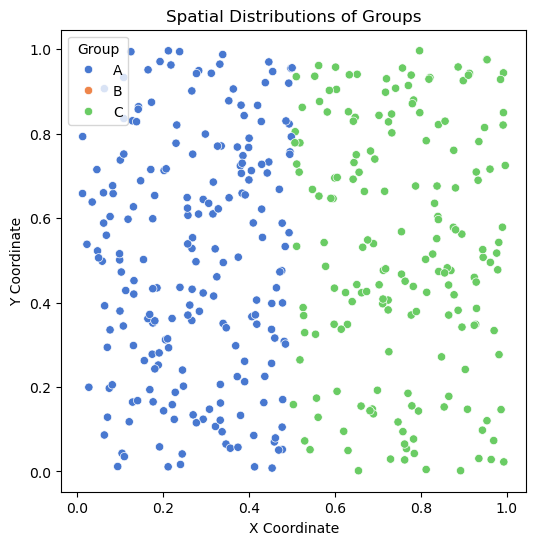

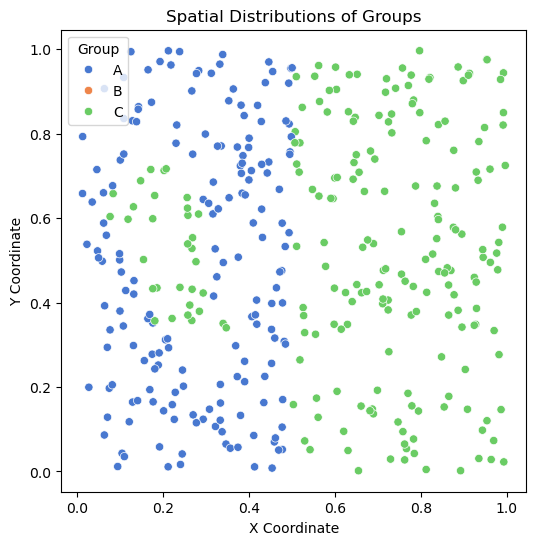

In [ ]:
plot(coordinate_file_truth)
plot(coordinate_file_pred)

In [ ]:
evaluate_metrics(coordinate_file_truth ,coordinate_file_pred , apply_gene_similarity= True , apply_AD_weight=False)

Graph Building took 0.04 seconds.
Getting edge attributes took 0.02 seconds.


KeyboardInterrupt: 

## Case 6:center split

### 集中

In [54]:
coordinate_file_truth = "data/simulate/Case6 (center_split)/center_split(20240310)/center_SpatialData.csv"
coordinate_file_pred = "data/simulate/Case6/Case6.1/center_SpatialData.csv"

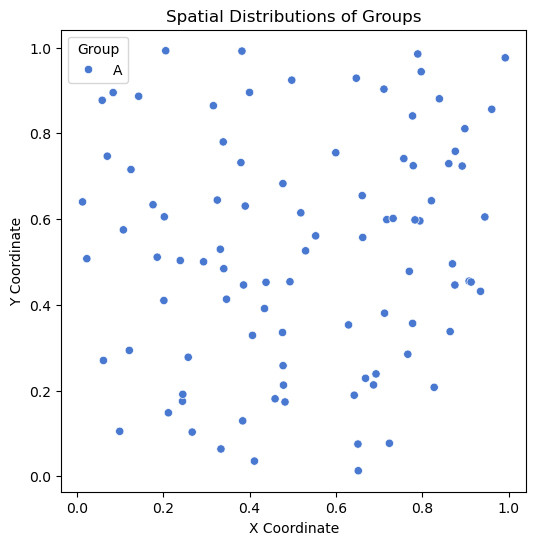

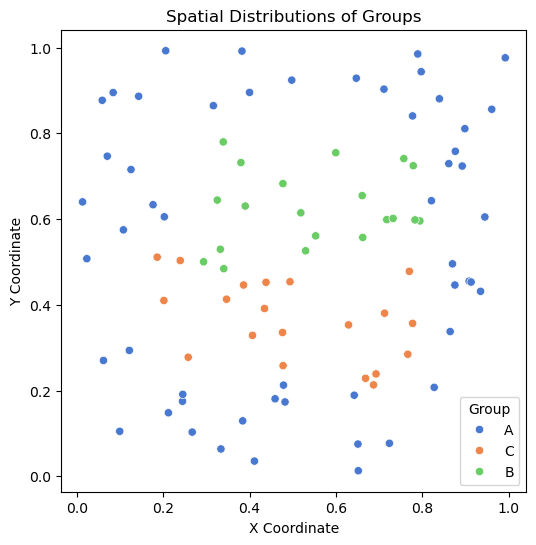

In [55]:
plot(coordinate_file_truth)
plot(coordinate_file_pred)

In [56]:
evaluate_metrics(coordinate_file_truth ,coordinate_file_pred , apply_gene_similarity= True , apply_AD_weight=False)

Graph Building took 0.01 seconds.
Getting edge attributes took 0.00 seconds.
Entire loop took 0.63662 seconds.
Average kernel execution time: 0.00637 seconds.
Entire loop took 0.39401 seconds.
Average kernel execution time: 0.00394 seconds.
Entire loop took 0.64385 seconds.
Average kernel execution time: 0.00644 seconds.


{'ARI': 0.0,
 'NMI': 0.0,
 'Silhouette Coefficient': -0.06526838772456982,
 'FMI': 0.6410457795232727,
 'SGD': 1.8177264212633957}

### 分散

In [57]:
coordinate_file_truth = "data/simulate/Case6/Case6.1/truth_SpatialData.csv"
coordinate_file_pred = "data/simulate/Case6/Case6.1/split_SpatialData.csv"

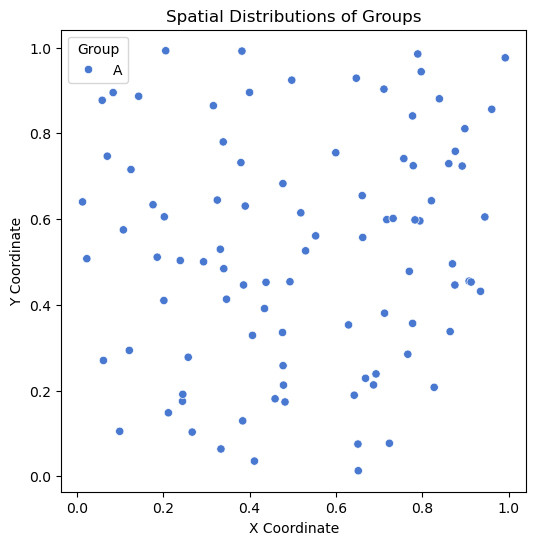

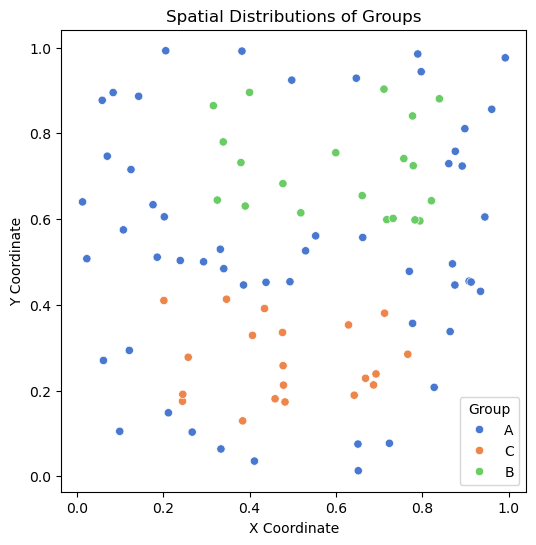

In [58]:
plot(coordinate_file_truth)
plot(coordinate_file_pred)

In [59]:
evaluate_metrics(coordinate_file_truth , coordinate_file_pred , apply_gene_similarity = True , apply_AD_weight=False)

Graph Building took 0.01 seconds.
Getting edge attributes took 0.00 seconds.
Entire loop took 0.56317 seconds.
Average kernel execution time: 0.00563 seconds.
Entire loop took 0.36584 seconds.
Average kernel execution time: 0.00366 seconds.
Entire loop took 0.58395 seconds.
Average kernel execution time: 0.00584 seconds.


{'ARI': 0.0,
 'NMI': 0.0,
 'Silhouette Coefficient': 0.020466204557013992,
 'FMI': 0.6410457795232727,
 'SGD': 1.7088075571203507}